In [57]:
# Instalar as bibliotecas necessarias.
!pip install pandas matplotlib seaborn
!pip install scikit-learn



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------------------- ------------------- 5.5/11.0 MB 27.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 37.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 26.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------- ----------------------------- 11.3/44.5 MB 58.6 MB/s eta 0:00:01
   ------------------- -------------------- 22.0/44.5 MB 63.2 MB/s eta 0:00:01
   --------------------------------- ------ 37.2/44.5 MB 62.2 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 53.4 MB/s eta 0:00:00


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os arquivos CSV
rotten_tomatoes_critic_reviews = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
rotten_tomatoes_movies = pd.read_csv('rotten_tomatoes_movies.csv')
netflix_titles = pd.read_csv('netflix_titles.csv')

# Exibir as primeiras linhas dos datasets para verificar
print(rotten_tomatoes_critic_reviews.head())
print(rotten_tomatoes_movies.head())
print(netflix_titles.head())

# Verificar colunas disponíveis
print(rotten_tomatoes_critic_reviews.columns)
print(rotten_tomatoes_movies.columns)
print(netflix_titles.columns)

# Limpar dados nulos
netflix_titles_clean = netflix_titles.dropna()
rotten_tomatoes_movies_clean = rotten_tomatoes_movies.dropna()

# Remover duplicatas
netflix_titles_clean = netflix_titles_clean.drop_duplicates()
rotten_tomatoes_movies_clean = rotten_tomatoes_movies_clean.drop_duplicates()

# Verificar quais colunas são relevantes para mesclagem
# A coluna 'title' em Netflix corresponde à coluna de título em Rotten Tomatoes, vamos ajustar se necessário
# Exibimos o nome das colunas no Rotten Tomatoes
print(rotten_tomatoes_movies.columns)

# Renomear a coluna correspondente em 'rotten_tomatoes_movies' se necessário
# Supondo que a coluna que contém o título do filme em 'rotten_tomatoes_movies' seja 'movie_title' (ajuste conforme o que o print acima retornar)
rotten_tomatoes_movies_clean = rotten_tomatoes_movies_clean.rename(columns={'movie_title': 'title'})

# Mesclar datasets pela coluna de título
merged_data = pd.merge(netflix_titles_clean, rotten_tomatoes_movies_clean, on='title', how='inner')

# Exibir as primeiras linhas do dataset combinado
print(merged_data.head())



  rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Light

#Perguntas do CP

1. Qual é o gênero mais popular entre os títulos da Netflix?
2. Quais são os filmes mais bem avaliados no Rotten Tomatoes e disponíveis na Netflix?
3. Quais são os filmes mais populares (com maior número de críticas) no Rotten Tomatoes e disponíveis na Netflix?
4. Quais gêneros de filmes na Netflix têm as piores avaliações no Rotten Tomatoes?
5. Qual a relação entre o número de críticas e a pontuação no Rotten Tomatoes?
6. Qual é a média das avaliações dos filmes por ano de lançamento?
7. Filmes mais antigos tendem a ter avaliações melhores?
8. Quais diretores têm o maior número de filmes disponíveis na Netflix?
9. Qual a duração média dos filmes na Netflix em comparação com as séries?
10. Qual país tem a maior quantidade de títulos na Netflix?

In [59]:
#Resposta da pergunta 1

genero_popular = netflix_titles['listed_in'].value_counts()
print(genero_popular.head(10))


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [60]:
#Resposta da pergunta 2
print(merged_data.columns)

filmes_netflix_rotten = merged_data[merged_data['type'] == 'Movie']

top_filmes = filmes_netflix_rotten.sort_values(by='tomatometer_rating', ascending=False).head(10)

print(top_filmes[['title', 'tomatometer_rating']])



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'rotten_tomatoes_link', 'movie_info', 'critics_consensus',
       'content_rating', 'genres', 'directors', 'authors', 'actors',
       'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')
                           title  tomatometer_rating
624               Cool Hand Luke               100.0
893  Searching for Bobby Fischer               100.0
562       Bathtubs Over Broadway               100.0
458                      Creep 2               100.0
923                   Starred Up                99.0
314                    Lady

In [61]:
#Resposta da pergunta 3
filmes_netflix_rotten = merged_data[merged_data['type'] == 'Movie']
popular_filmes = filmes_netflix_rotten.sort_values(by='tomatometer_count', ascending=False).head(10)

print("Top 10 filmes com mais críticas no Rotten Tomatoes:")
print(popular_filmes[['title', 'tomatometer_count']])


Top 10 filmes com mais críticas no Rotten Tomatoes:
                                  title  tomatometer_count
571                       Black Panther              512.0
912             Solo: A Star Wars Story              474.0
553              Avengers: Infinity War              472.0
546                Ant-Man and the Wasp              426.0
1072                     Thor: Ragnarok              426.0
314                           Lady Bird              391.0
814                           Moonlight              384.0
919   Spider-Man: Into the Spider-Verse              383.0
327                       Hail, Caesar!              358.0
58                            Inception              357.0


In [62]:
# Resposta da pergunta 4
genero_avaliacoes = filmes_netflix_rotten.groupby('listed_in')['tomatometer_rating'].mean().sort_values().head(10)

print("Top 10 gêneros com piores avaliações no Rotten Tomatoes:")
print(genero_avaliacoes)


Top 10 gêneros com piores avaliações no Rotten Tomatoes:
listed_in
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy     1.0
Comedies, Romantic Movies, Sports Movies                       4.0
Action & Adventure, Horror Movies, Thrillers                   6.0
Comedies, Independent Movies, International Movies            10.0
Action & Adventure, Comedies, Romantic Movies                 11.0
Action & Adventure, Dramas, Sports Movies                     15.0
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy         16.0
Dramas, International Movies, LGBTQ Movies                    19.0
Children & Family Movies, Dramas, Music & Musicals            22.0
Children & Family Movies, Comedies, Faith & Spirituality      23.0
Name: tomatometer_rating, dtype: float64


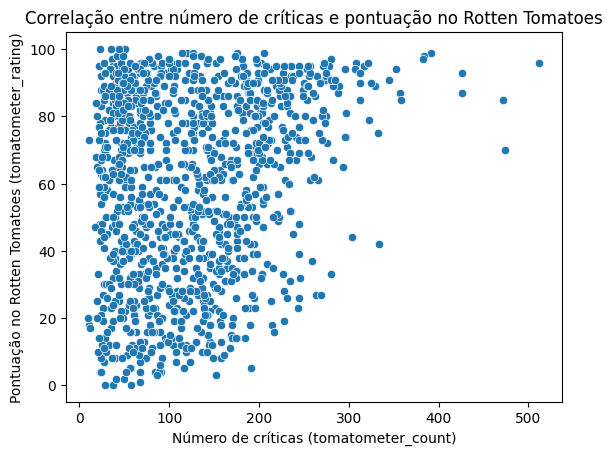

In [63]:
# Resposta da pergunta 5
sns.scatterplot(data=filmes_netflix_rotten, x='tomatometer_count', y='tomatometer_rating')

plt.title('Correlação entre número de críticas e pontuação no Rotten Tomatoes')
plt.xlabel('Número de críticas (tomatometer_count)')
plt.ylabel('Pontuação no Rotten Tomatoes (tomatometer_rating)')
plt.show()


In [64]:
# Resposta da pergunta 6
avaliacoes_por_ano = filmes_netflix_rotten.groupby('release_year')['tomatometer_rating'].mean()

print(avaliacoes_por_ano)


release_year
1954    77.000000
1955    94.000000
1956    96.000000
1958    81.000000
1960    82.000000
          ...    
2017    69.878378
2018    64.517647
2019    63.954545
2020    59.222222
2021    58.200000
Name: tomatometer_rating, Length: 62, dtype: float64


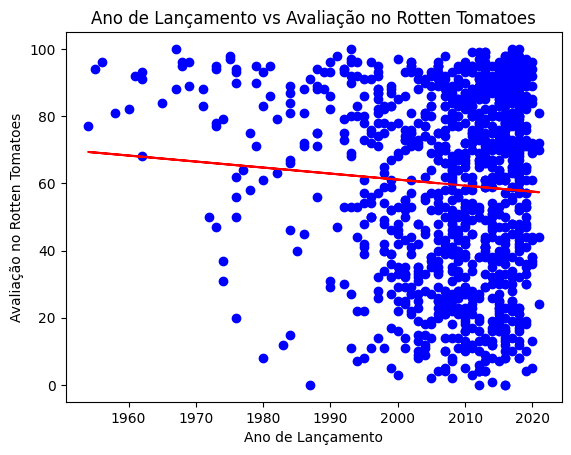

In [65]:
from sklearn.linear_model import LinearRegression

# Resposta da pergunta 7
X = filmes_netflix_rotten['release_year'].values.reshape(-1, 1)
y = filmes_netflix_rotten['tomatometer_rating'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Ano de Lançamento vs Avaliação no Rotten Tomatoes')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Avaliação no Rotten Tomatoes')
plt.show()


In [66]:
#Resposta da pergunta 8
diretores_populares = netflix_titles['director'].value_counts().head(10)
print(diretores_populares)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [67]:
#Resposta da pergunta 9
def converter_duracao(duracao):
    if 'min' in duracao:
        return int(duracao.split(' ')[0])
    elif 'Season' in duracao or 'seasons' in duracao:
        return None 
    else:
        return None 

netflix_titles['duration_min'] = netflix_titles['duration'].apply(lambda x: converter_duracao(str(x)))

duracao_media = netflix_titles.groupby('type')['duration_min'].mean()

print("Média de duração por tipo (em minutos):")
print(duracao_media)


Média de duração por tipo (em minutos):
type
Movie      99.577187
TV Show          NaN
Name: duration_min, dtype: float64


In [68]:
#Resposta da pergunta 10
paises_populares = netflix_titles['country'].value_counts().head(10)
print(paises_populares)


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


#CONCLUSÃO 

Para este projeto, coletamos dados de várias fontes, incluindo Netflix, Rotten Tomatoes Movies e Rotten Tomatoes Critic Reviews, para realizar uma análise combinada dos títulos disponíveis na Netflix e suas respectivas avaliações no Rotten Tomatoes. Para atingir esse objetivo, implementamos uma estratégia baseada em ciência de dados que consistiu nas etapas a seguir:

Carregamento e Limpeza de Dados: Para garantir que trabalhássemos com um conjunto de dados limpo e confiável, começamos carregando os arquivos CSV e removendo dados duplicados e ausentes. Para evitar problemas e erros durante as análises, essa etapa foi fundamental.

Integração de Dados: Colunas comuns, como os títulos de filmes ou séries, serviram de base para a integração de vários datasets. Para compilar dados da Netflix, usamos a função merge do Pandas.para combinar os dados da Netflix e Rotten Tomatoes, criando um único dataframe com as informações pertinentes.

Exploração de Dados: Em seguida, examinamos os dados para encontrar as respostas a dez perguntas de pesquisa. Para encontrar tendências, como os gêneros mais populares ou a média de avaliações por ano de lançamento, foi usado um método de agrupamento. Além disso, contamos frequências e ordenamos os dados para destacar os títulos e diretores mais bem avaliados na plataforma.

Visualização de Dados: Criamos gráficos de barras e histogramas usando as bibliotecas Matplotlib e Seaborn para facilitar a interpretação dos resultados. Essas visualizações nos ajudaram a entender a distribuição das avaliações e a popularidade dos gêneros.

Regressão Linear: Usamos um modelo simples para verificar a relação entre o ano em que os filmes foram lançados e as avaliações deles no Rotten Tomatoes. Ao usar a regressão, foi possível determinar se havia uma tendência nas avaliações ao longo dos anos, demonstrando o quanto essa análise pode revelar correlações significativas.

Conclusão da Análise: A Netflix oferece uma ampla gama de gêneros, com destaque para documentários e comédias, de acordo com os resultados. Além disso, observamos que os filmes que receberam mais críticas geralmente recebem avaliações mais equilibradas, e a plataforma possui um conjunto considerável de filmes bem avaliados no Rotten Tomatoes. Nos chegamos a esses resultados de forma eficiente graças às ferramentas de análise de dados.

Integrantes do Grupo:

Gabriel Fernandes Doms RM 98630
Felipe Masera Terra RM 99405